# Wykrywanie krwinek

# Niezbędne biblioteki:

In [1]:
from PIL import Image
import numpy as np
from skimage import io, filters
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2

Ta metoda opiera się na książce "Learning OpenCV 3 Computer Vision with Python" (da się znaleźć odpowiedni fragment w internecie) i artykule: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html, cała ta metoda jest jednak całkowicie bezużyteczna, jeżeli nie wypełnimy dziur (przykład znajduje się pod opisem procedury). Następny przykład wymaga wprowadzenia kolejnych modyfikacji.

# Krok 1: Wczytujemy obraz, zmieniamy na skalę szarości, później na binarny

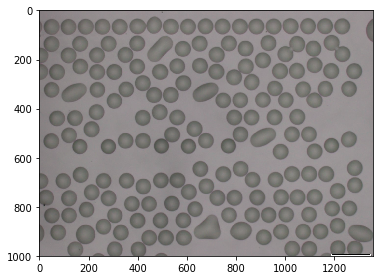

In [2]:
img = cv2.imread('blood_cells.jpg')
io.imshow(img)

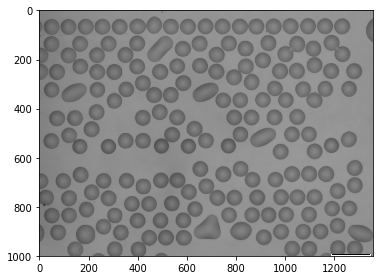

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
io.imshow(gray)

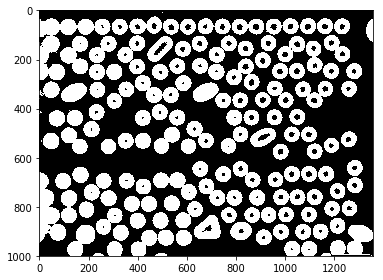

In [4]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
io.imshow(thresh)

# Krok 2: Wypełniamy dziury (poprzez wyszukanie konturów)

https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html 
(outputs are only the contours and hierarchy)

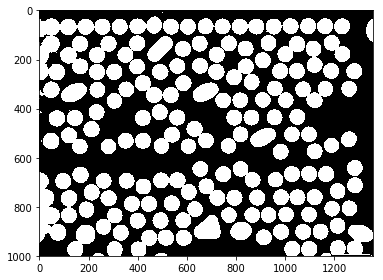

In [5]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(thresh,[cnt],0,255,-1)

io.imshow(thresh)

# Krok 3: Transformacje morfologiczne

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

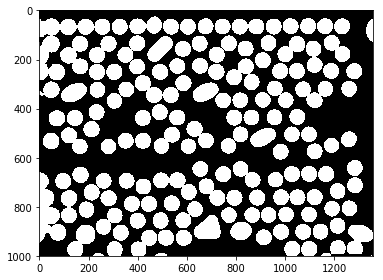

In [6]:
# Usuwanie szumu
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel,iterations=2)
io.imshow(opening)

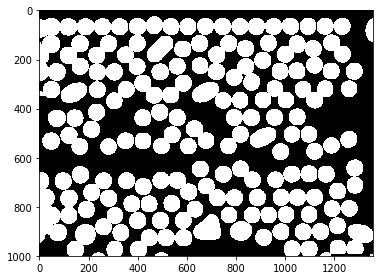

In [7]:
# Znajdowanie pewnego tła - czarne obszary na pewno stanowią tło
sure_bg = cv2.dilate(opening,kernel,iterations=2)
io.imshow(sure_bg)

https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


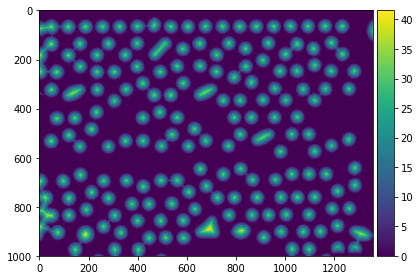

In [8]:
# Znajdowanie pewnego pierwszego planu - białe obszary na pewno stanowią pierwszy plan
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
io.imshow(dist_transform)

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


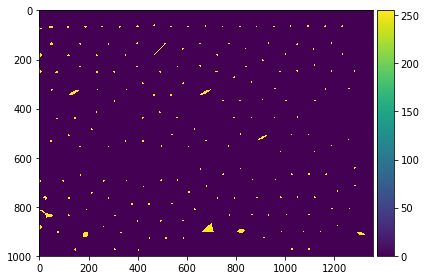

In [9]:
sure_fg = np.uint8(sure_fg)
io.imshow(sure_fg)

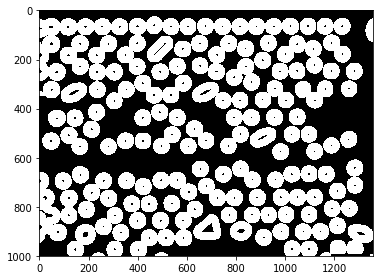

In [10]:
# Znajdowanie niepewnego obszaru
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(unknown)

# Krok 4: Watershed

In [11]:
# Etykietowanie znaczników
ret, markers = cv2.connectedComponents(sure_fg)

# Dodajemy 1 do wszystkich etykiet
markers = markers+1

# Oznaczamy nieznany, niepewny obszar przez 0 (z powyższego tylko te obszary mają 0)
markers[unknown==255] = 0

#Transformacja watershed
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

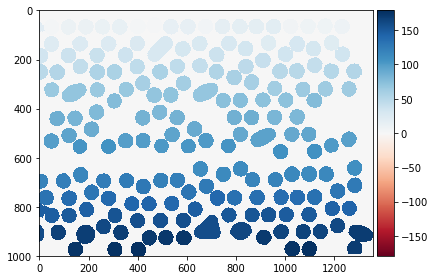

In [12]:
io.imshow(markers)

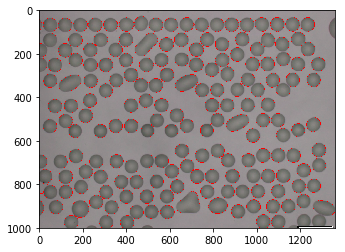

In [13]:
plt.imshow(img)
plt.show()

In [14]:
print(markers.max())

179


# Dlaczego należy wypełniać dziury?

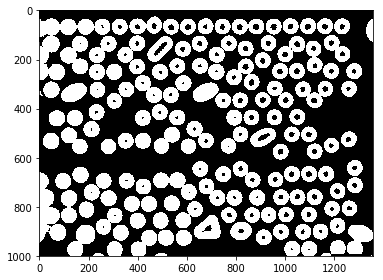

In [15]:
img = cv2.imread('blood_cells.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel,iterations=2)
io.imshow(opening)

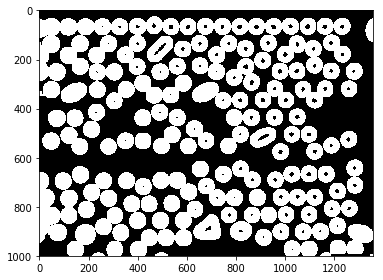

In [16]:
sure_bg = cv2.dilate(opening,kernel,iterations=2)
io.imshow(sure_bg)

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


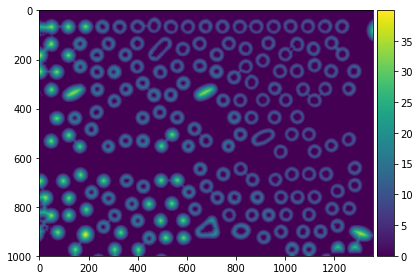

In [17]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
io.imshow(dist_transform)

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


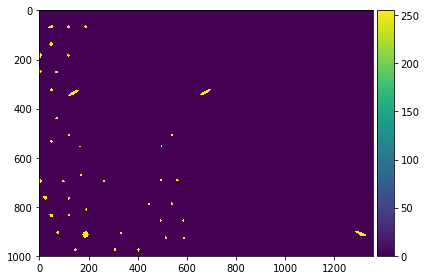

In [18]:
sure_fg = np.uint8(sure_fg)
io.imshow(sure_fg)

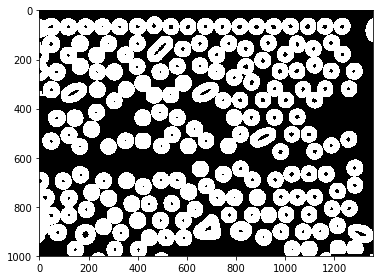

In [19]:
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(unknown)

In [20]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

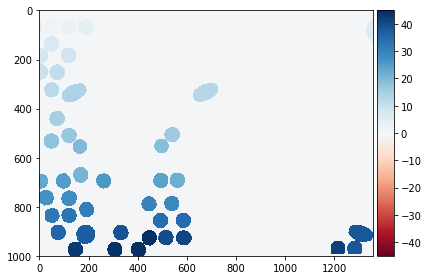

In [21]:
io.imshow(markers)

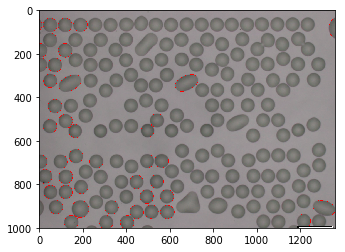

In [22]:
plt.imshow(img)
plt.show()

In [23]:
print(markers.max())

45


# Bardziej skomplikowany przykład (więcej nakładających się elementów, biała krwinka)

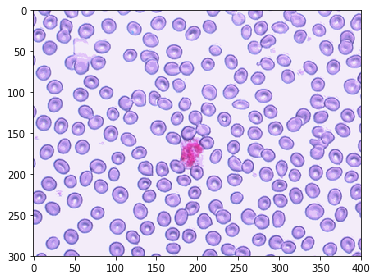

In [24]:
img = cv2.imread('red_blood_cells.png')
io.imshow(img)

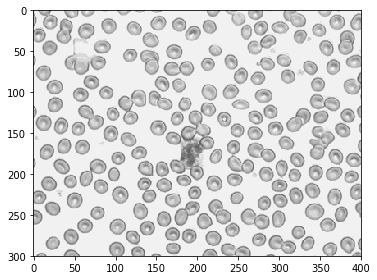

In [25]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
io.imshow(gray)

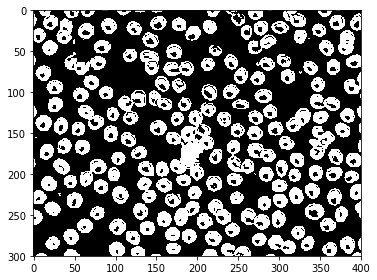

In [26]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
io.imshow(thresh)

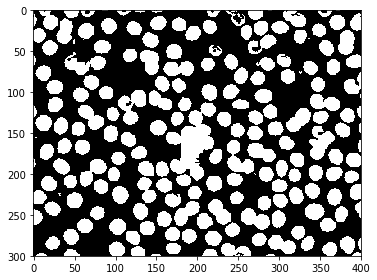

In [27]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(thresh,[cnt],0,255,-1)

io.imshow(thresh)

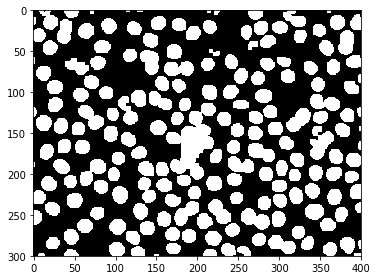

In [28]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel,iterations=2)
io.imshow(opening)

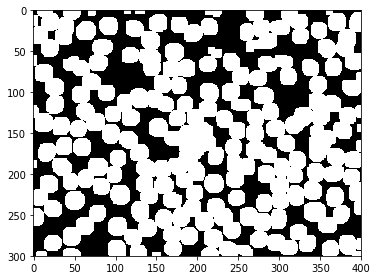

In [29]:
sure_bg = cv2.dilate(opening,kernel,iterations=2)
io.imshow(sure_bg)

# Opcja nr 1 - jak wcześniej

Spoiler: Tutaj skorzystanie z ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0) nie da pożądanego efektu, należało wprowadzić modyfikację.

Threshold: The first parameter here is the image. The next parameter is the threshold. The next is the maximum value. Next and finally we have the type of threshold.

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


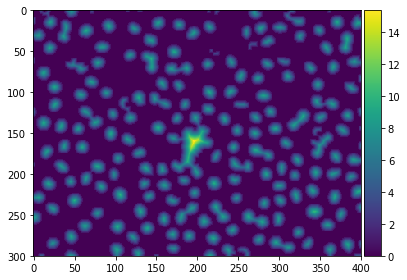

In [30]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
io.imshow(dist_transform)

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


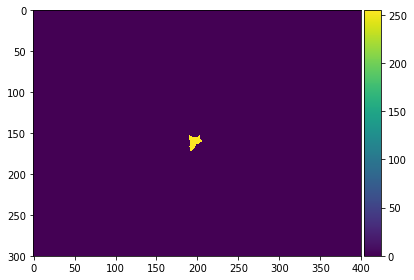

In [31]:
sure_fg = np.uint8(sure_fg)
io.imshow(sure_fg)

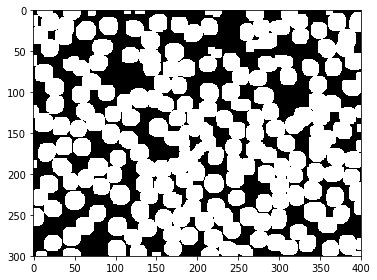

In [32]:
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(unknown)

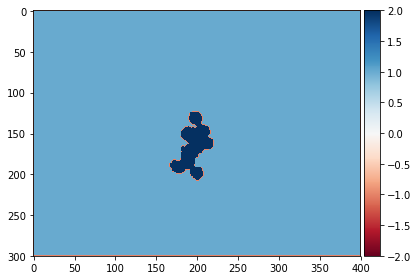

In [33]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
io.imshow(markers)

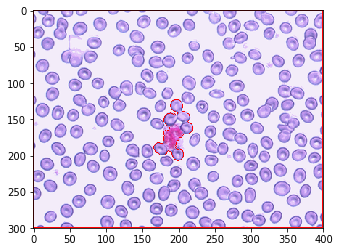

In [34]:
plt.imshow(img)
plt.show()

In [35]:
print(markers.max())

2


# Opcja nr 2 - zamieniamy max na mean

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


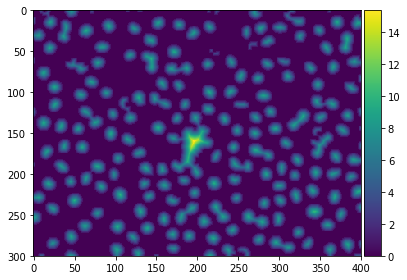

In [36]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, dist_transform.mean(),255, 0)
io.imshow(dist_transform)

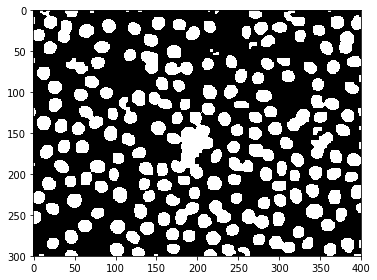

In [37]:
sure_fg = np.uint8(sure_fg)
io.imshow(sure_fg)

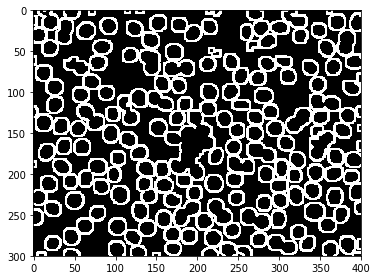

In [38]:
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(unknown)

In [39]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

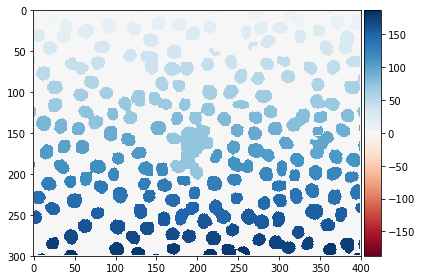

In [40]:
io.imshow(markers)

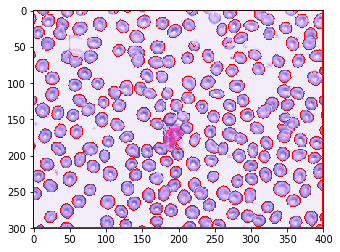

In [41]:
plt.imshow(img)
plt.show()

In [42]:
print(markers.max())

187


# Opcja nr 3 - zwraca najlepszy wynik

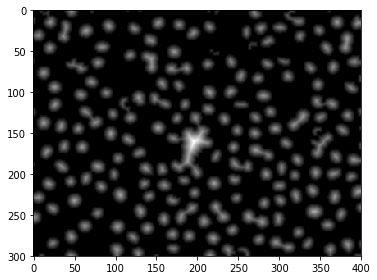

In [43]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
dist2 = cv2.normalize(dist_transform, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
ret, sure_fg = cv2.threshold(dist2, 0, int(dist_transform.max()), cv2.THRESH_BINARY + cv2.THRESH_OTSU)
io.imshow(dist2)

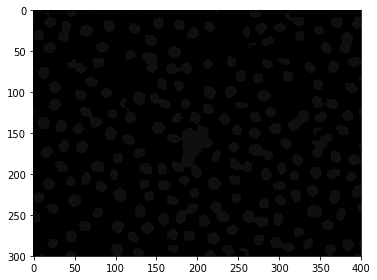

In [44]:
sure_fg = np.uint8(sure_fg)
io.imshow(sure_fg)

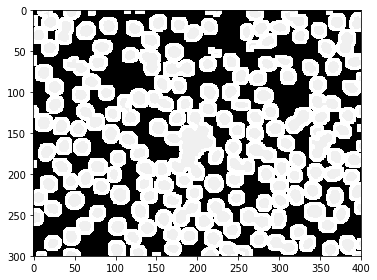

In [45]:
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(unknown)

In [46]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

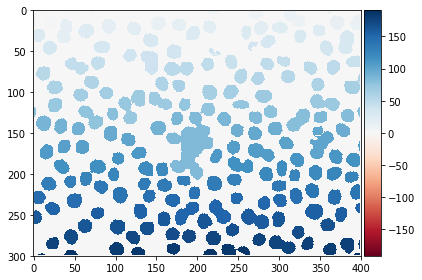

In [47]:
io.imshow(markers)

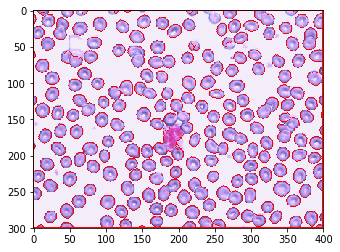

In [48]:
plt.imshow(img)
plt.show()

In [49]:
print(markers.max())

191


# Opcja nr 4 

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


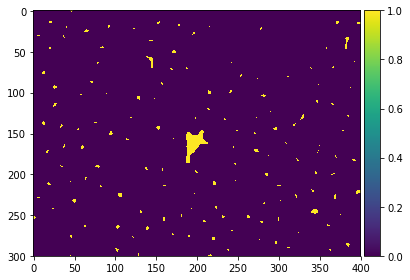

In [50]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
dist2 = cv2.normalize(dist_transform, dist_transform, 0, 1., cv2.NORM_MINMAX, cv2.CV_8UC1)
ret, sure_fg = cv2.threshold(dist2, 0, int(dist_transform.mean()), cv2.THRESH_BINARY + cv2.THRESH_OTSU)
io.imshow(dist2)

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


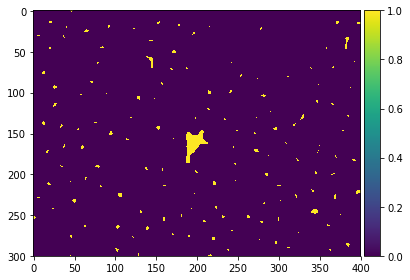

In [51]:
sure_fg = np.uint8(sure_fg)
io.imshow(sure_fg)

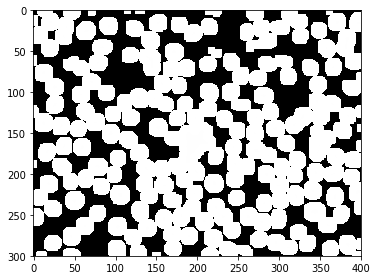

In [52]:
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(unknown)

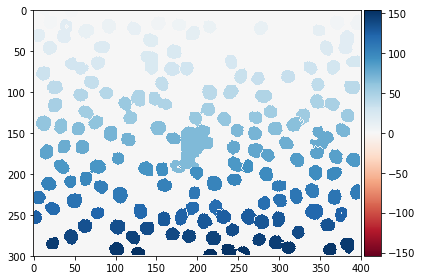

In [53]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
io.imshow(markers)

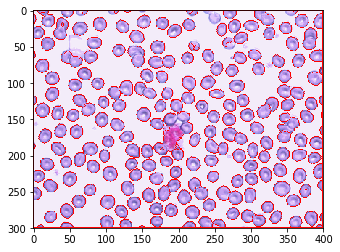

In [54]:
plt.imshow(img)
plt.show()

In [55]:
print(markers.max())

154


# Opcja nr 5 

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


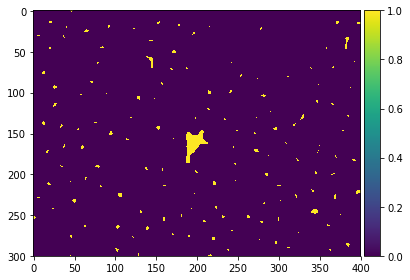

In [56]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
dist2 = cv2.normalize(dist_transform, dist_transform, 0, 1., cv2.NORM_MINMAX, cv2.CV_8UC1)
io.imshow(dist2)

C:\Users\Patrycja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


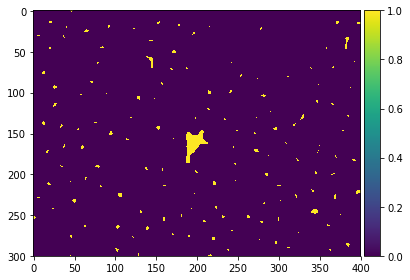

In [57]:
ret, sure_fg = cv2.threshold(dist2, 0, 0.7*int(dist_transform.mean()), cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)
io.imshow(sure_fg)

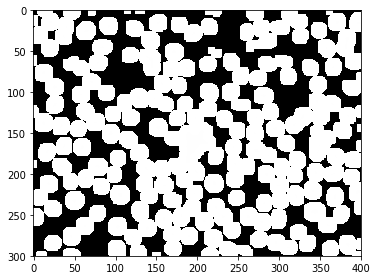

In [58]:
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(unknown)

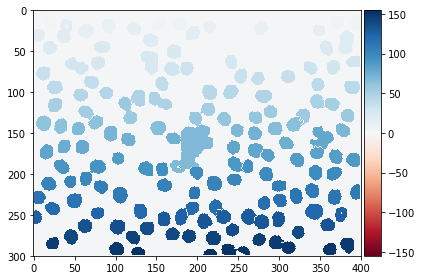

In [59]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+2
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
io.imshow(markers)

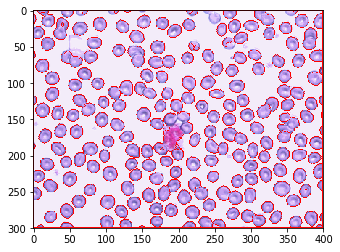

In [60]:
plt.imshow(img)
plt.show()

Znalezione gdzieś w internecie:

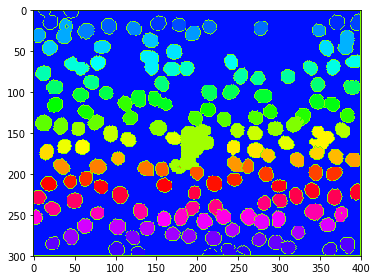

In [61]:
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    io.imshow(labeled_img)

imshow_components(markers)

In [62]:
print(markers.max())

155


## Uwaga: Modyfikacje najlepszej opcji nr 3 (zamiana int(dist_transform.max()) na mean lub mnożenie razy skalar) nie zmieniają już liczby krwinek. Zmniejszenie podowuje jedynie usunięcie progu OTSU

191


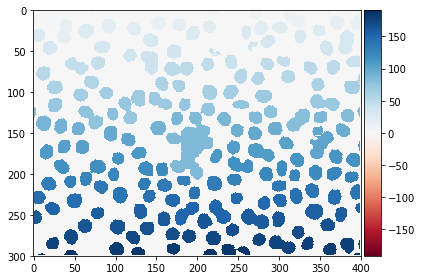

In [63]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
dist2 = cv2.normalize(dist_transform, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
ret, sure_fg = cv2.threshold(dist2, 0, int(dist_transform.max()), cv2.THRESH_BINARY + cv2.THRESH_OTSU)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
io.imshow(markers)
print(markers.max())